# Detecting Damaged Buildings based on Post- Hurricane Satellite Imagery: Data Wrangling & EDA


In [1]:
# Load appropriate modules
from os import listdir
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from pathlib import Path
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (8, 8)
%matplotlib inline

### Load data into a Dataframe

In [2]:
file_structure = os.listdir("C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data")
file_structure_2 = os.listdir("C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data/train_another")
file_structure_3 = os.listdir("C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data/train_another/damage")

print(file_structure)
print(file_structure_2)
print(file_structure_3[:2])

['data.csv', 'test', 'test_another', 'train_another', 'validation_another']
['damage', 'no_damage']
['-93.55964_30.895018.jpeg', '-93.573763_30.693981.jpeg']


From the file strucure above, we can make a dataframe separating all the relevant features by using the filepath names and the Pathlib library. https://docs.python.org/3/library/pathlib.html#pathlib.WindowsPath

In [3]:
input_path = "C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data"
# Make dataframe from training, testing, and validation sets
image_df = pd.DataFrame({'path': list(Path(input_path).glob('**/*.jp*g'))})
# define columns showing relevant image information.  
image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem) #extract damaged or no_damge from file structure
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem) # extract test, train, and validation
image_df['location'] = image_df['path'].map(lambda x: x.stem) # extract location from file name
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0])) # split into logitude
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[-1])) #split into latitiude 
image_df['path'] = image_df['path'].map(lambda x: str(x)) # convert the path back to a string
image_df['image'] = image_df['path'].map(lambda x: plt.imread(x)) # convert image to numpy array 
# Save to csv file
image_df.to_csv(r"C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data/data.csv")
image_df.head()


path  damage data_split  \
0  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage       test   
1  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage       test   
2  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage       test   
3  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage       test   
4  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage       test   

                        location        lon        lat  \
0           -93.548123_30.900623 -93.548123  30.900623   
1           -93.560128_30.894917 -93.560128  30.894917   
2  -93.578271_30.779923999999998 -93.578271  30.779924   
3           -93.590598_30.694956 -93.590598  30.694956   
4           -93.604017_30.793719 -93.604017  30.793719   

                                               image  
0  [[[27, 37, 26], [26, 36, 25], [25, 35, 24], [2...  
1  [[[39, 62, 44], [37, 60, 42], [32, 55, 37], [2...  
2  [[[102, 105, 74], [102, 105, 74], [100, 103, 7...  
3  [[[87, 96, 77], [89, 98, 79], [76, 85, 66], [4...  
4  [[[83, 88, 48], [84, 89, 49], [86, 91, 51], [8...

### Separate training & test sets
Because this data was pulled from kaggle and already separated into train, test and validation, I'm going to combine validation and train images together and leave the test sets alone. This will increase the overall size of my training data hopefully leading to better model accuracy. 

In [4]:
# Separate training & test sets
train_df = image_df[(image_df['data_split']=='train_another') | (image_df['data_split']=='validation_another')]
test_df = image_df[(image_df['data_split']=='test') | (image_df['data_split']=='test_another')]

In [5]:
#reset Index for both dataframes
train_df.reset_index(inplace=True)
train_df.drop(['index'],axis=1,inplace=True)
test_df.reset_index(inplace=True)
test_df.drop(['index'],axis=1,inplace=True)


C:\Users\public\Anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
train_df.head()

path  damage     data_split  \
0  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage  train_another   
1  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage  train_another   
2  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage  train_another   
3  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage  train_another   
4  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  damage  train_another   

                                location        lon        lat  \
0                    -93.55964_30.895018 -93.559640  30.895018   
1                   -93.573763_30.693981 -93.573763  30.693981   
2          -93.578271_30.779923999999998 -93.578271  30.779924   
3                    -93.59011_30.695412 -93.590110  30.695412   
4  -93.59030899999999_30.694764000000003 -93.590309  30.694764   

                                               image  
0  [[[106, 118, 80], [90, 102, 64], [80, 92, 54],...  
1  [[[57, 106, 51], [57, 106, 51], [57, 106, 51],...  
2  [[[102, 105, 74], [102, 105, 74], [100, 103, 7...  
3  [[[36, 66, 40], [37, 67, 41], [39, 69, 43], [3...  
4  [[[43, 47, 33], [55, 59, 45], [63, 67, 53], [6...

In [7]:
# Checkout the strucure of the dataframe
print(train_df.shape)
train_df.info()

(12000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   path        12000 non-null  object 
 1   damage      12000 non-null  object 
 2   data_split  12000 non-null  object 
 3   location    12000 non-null  object 
 4   lon         12000 non-null  float64
 5   lat         12000 non-null  float64
 6   image       12000 non-null  object 
dtypes: float64(2), object(5)
memory usage: 656.4+ KB


In [8]:
# Checkout the number of unique locations
train_df.location.nunique()

9476

In [9]:
# See how many location duplicates we have
duplicates = train_df[train_df.duplicated(['location'])]
duplicates.head(3)

path     damage  \
5000  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  no_damage   
5001  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  no_damage   
5002  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  no_damage   

         data_split                       location        lon        lat  \
5000  train_another           -95.061275_29.831535 -95.061275  29.831535   
5001  train_another  -95.061412_29.826522999999998 -95.061412  29.826523   
5002  train_another  -95.061825_29.828608000000003 -95.061825  29.828608   

                                                  image  
5000  [[[44, 60, 31], [72, 89, 57], [71, 88, 54], [5...  
5001  [[[98, 106, 69], [99, 107, 70], [102, 110, 73]...  
5002  [[[37, 45, 22], [38, 46, 23], [37, 45, 22], [3...

Because these images were taken before and after the hurricane, many locations will be the same: one before the hurricane and one after. Let's look at an example.


In [10]:
# find an example
train_df.loc[lambda train_df: train_df['location'] == '-96.996838_28.781218']

path     damage  \
4972   C:\Users\Jake Wojcik\Documents\Springboard\DS ...     damage   
11991  C:\Users\Jake Wojcik\Documents\Springboard\DS ...  no_damage   

               data_split              location        lon        lat  \
4972        train_another  -96.996838_28.781218 -96.996838  28.781218   
11991  validation_another  -96.996838_28.781218 -96.996838  28.781218   

                                                   image  
4972   [[[95, 96, 64], [98, 99, 67], [101, 102, 70], ...  
11991  [[[84, 96, 56], [85, 97, 57], [85, 97, 57], [8...

In [11]:
# plot damaged vs. non-damaged
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(train_df['image'][4972])
ax1.set_title('Damaged')
ax1.grid(False)
ax2.imshow(train_df['image'][11991])
ax2.set_title('non-damaged')
ax2.grid(False)


Quite the difference! You can tell the damaged image has evidence of flooding and building damge compared to the non-damaged image.

## Explore Data

In [12]:
#get the number of rows in image
def get_x(image):
    return image.shape[0]

#get number of columns in image
def get_y(image):
    return image.shape[1]


In [13]:
#create columns for rows of an image
train_df['rows'] = train_df.image.apply(get_x)

#create columns for columns of an image
train_df['columns'] = train_df.image.apply(get_y)

#create columns for image aspect ratio
train_df['aspect_ratio'] = train_df['columns'] / train_df['rows']

C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Plot the rows vs columns to get a better idea of the average aspect ratios across the images.

In [14]:
plt.scatter(train_df['rows'], train_df['columns'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(train_df['rows']),2))
print('Mean Columns: ', round(np.mean(train_df['columns']),2))
print('Mean Aspect Ratio: ', round(np.mean(train_df.aspect_ratio),2))

Mean Rows:  128.0
Mean Columns:  128.0
Mean Aspect Ratio:  1.0


Great! All of our images are the same size and aspect ratio so we don't have to make any changes before modeling.

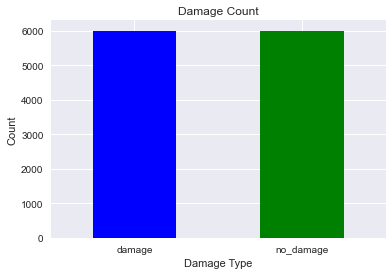

In [15]:
train_df.damage.value_counts().plot(kind = 'bar', color = ['b', 'g'])
plt.title('Damage Count')
plt.xlabel('Damage Type')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

Our train set is balanced with 6000 images of damaged and non-damaged each. 

#### Visualize spatial disribution of the images

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
for c_group, c_rows in train_df.groupby(['damage']):
    ax1.plot(c_rows['lat'], c_rows['lon'], '.', label=c_group, alpha=0.5)
ax1.legend()
ax1.set_title('Data by Damage Type')
ax1.set_xlabel('latitude')
ax1.set_ylabel('longitiude')
for c_group, c_rows in train_df.groupby(['data_split']):
    ax2.plot(c_rows['lat'], c_rows['lon'], '.', label=c_group, alpha=0.5)
ax2.legend()
ax2.set_title('Data by Group')
ax2.set_xlabel('latitude')
ax2.set_ylabel('longitiude')
plt.show()

It looks like we have around 4 different spatial clusters in this dataset. Interestingly, the top right corner of the plot only has damaged buildings. The train,and validation sets seem to be distributed evenly through space. Let's take a look at what the data looks like on a map.

In [480]:
import plotly.express as px
from plotly.offline import plot
px.set_mapbox_access_token('pk.eyJ1IjoianN3b2pjaWs5IiwiYSI6ImNraDZubWFtaDAxdGYycms3bTJpc2cyeGMifQ.c7ZqIlqdZ5zS2p2WOjwvNw')
                        
fig = px.scatter_mapbox(train_df, lat="lat", lon="lon", color="damage",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6.4)
fig.update_layout(mapbox_style="satellite-streets")
fig.show()


So it looks like we have data from Vicoria, the greater Houston area, and Beaumont. If you zoom in closely you can see most of the damaged images occur around the banks of rivers. 

### Plot the color distribution of images


In [17]:
#separate dataframes by damged and not damaged in order to compare colors
damaged_df = train_df[train_df['damage']=='damage']
no_damage_df = train_df[train_df['damage']=='no_damage']
damaged_df.reset_index(inplace=True)
no_damage_df.reset_index(inplace=True)

In [287]:
# plot mean colors between damaged and not damaged images
red_d = []
green_d = []
blue_d = []
for i in damaged_df['image']:
    red_d.append(i[:,:,0].mean())
    green_d.append(i[:,:,1].mean())
    blue_d.append(i[:,:,2].mean())
    
# Compute mean of rgb values for damaged images
red_d_mean = round(np.mean(red_d),0)
green_d_mean = round(np.mean(green_d),0)
blue_d_mean = round(np.mean(blue_d),0)

red = []
green = []
blue = []
for i in no_damage_df['image']:
    red.append(i[:,:,0].mean())
    green.append(i[:,:,1].mean()) 
    blue.append(i[:,:,2].mean())

# Compute mean of rgb values for non damged images
red_mean = round(np.mean(red),0)
green_mean = round(np.mean(green),0)
blue_mean = round(np.mean(blue),0)
# PLot
# Create x axis labels
labels = ['red','green','blue']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create list for easy plotting
damaged_means = [red_d_mean,green_d_mean,blue_d_mean]
non_damaged_means = [red_mean,green_mean,blue_mean]

fig, (ax,ax2) = plt.subplots(1,2,figsize=(15,8))
rects1 = ax.bar(x - width/2, damaged_means, width, label='Damaged')
rects2 = ax.bar(x + width/2, non_damaged_means, width, label='Undamaged')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RGB Value')
ax.set_title('Average RGB Values grouped by damaged vs. non-damaged')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Create list of sums for each color
damaged_counts = [sum(red_d),sum(green_d),sum(blue_d)]
non_damaged_counts = [sum(red),sum(green),sum(blue)]

rects3 = ax2.bar(x - width/2, damaged_counts, width, label='Damaged')
rects4 = ax2.bar(x + width/2, non_damaged_counts, width, label='Undamaged')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Count')
ax2.set_title('Counts of RGB Values grouped by damaged vs. Undamaged')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.tight_layout()

plt.show()


The undamaged images have more color intensity in all three channels. Lets take a look at mean vs. Standard devaition for all three cahannels. In this way, we can detect image outliers. 

In [356]:
# Mean Values vs. stdev of every image in RGB Channels
std_red_d = []
std_green_d = []
std_blue_d = []
# Get standard deviation of each image
for i in damaged_df['image']:
    std_red_d.append(i[:,:,0].std())
    std_green_d.append(i[:,:,1].std())
    std_blue_d.append(i[:,:,2].std())

# Plot Results
plt.figure(figsize=(20,15))
ax1 = plt.subplot(3,3,1)
plt.scatter(x=red_d,y=std_red_d, color='r')
plt.title('Damaged Red')
plt.ylabel('Standard Deviation',fontsize=20)
plt.subplot(3,3,2,sharex=ax1,sharey=ax1)
plt.scatter(x=green_d,y=std_green_d, color='g')
plt.title('Damaged Green')
plt.subplot(3,3,3,sharex=ax1,sharey=ax1)
plt.scatter(x=blue_d,y=std_blue_d, color='b')
plt.title('Damaged Blue')
#Plot Undamaged
ax2 = plt.subplot(3,3,4)
plt.scatter(x=red,y=std_red, color='r')
plt.title('Undamaged Red')

plt.xlabel('Mean',fontsize=20)
plt.subplot(3,3,5,sharex=ax2,sharey=ax2)
plt.scatter(x=green,y=std_green, color='g')
plt.title('Undamaged Green')
plt.subplot(3,3,6,sharex=ax2,sharey=ax2)
plt.scatter(x=blue,y=std_blue, color='b')
plt.title('Undamaged Blue')
plt.show()



It appears the undamaged images have more outliers specifically images with very high intensity levels and a little standard deviation. We can also see the damaged images have more variance overall than the more tightly clustered undamaged images. 

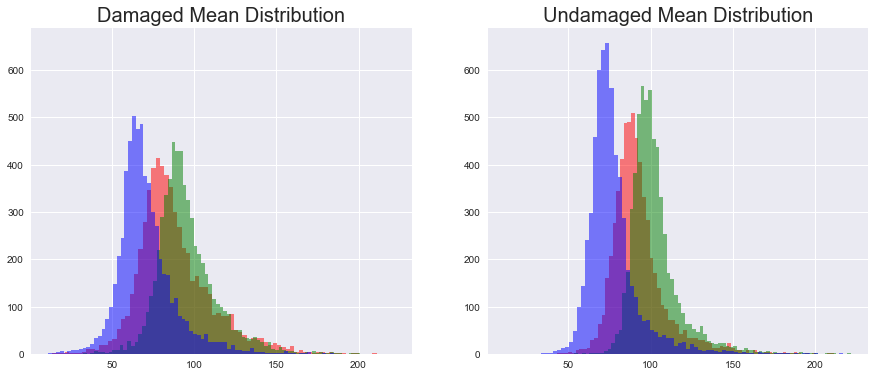

In [437]:
# plot histograms of mean values for each channel
# Plot Results
plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
plt.hist(red_d,bins=75,color='r',alpha=.5)
plt.hist(green_d,bins=75,color='g',alpha=.5)
plt.hist(blue_d,bins=75,color='b',alpha=.5)
plt.title('Damaged Mean Distribution',fontsize=20)
#Plot Undamaged
plt.subplot(1,2,2,sharex=ax1,sharey=ax1)
plt.hist(red,bins=75, color='r',alpha=.5)
plt.hist(green,bins=75,color='g',alpha=.5)
plt.hist(blue,bins=75,color='b',alpha=.5)
plt.title('Undamaged Mean Distribution',fontsize=20)
plt.show()


We see the same trend from the scatter plots.  Damaged images have more variance and less intensity overall compared to undamaged images. Let's plot an individual image from each class and see if we see the same results. 

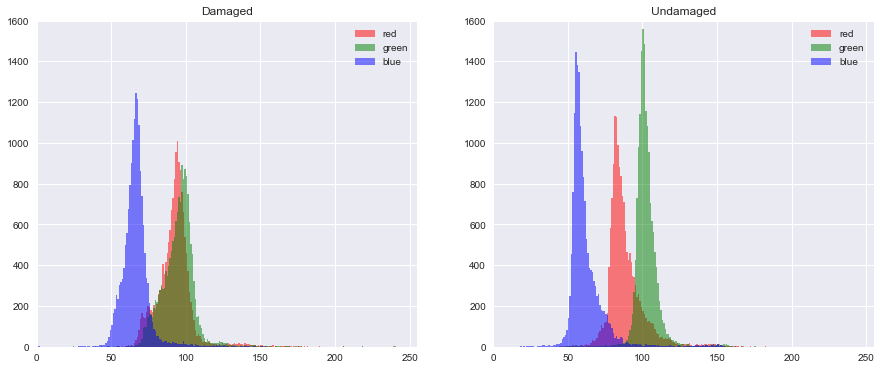

In [269]:
# Plot a random image from each class for a sanity check
img_d = plt.imread(train_df['path'][4972])
img = plt.imread(train_df['path'][11991])
jpg_channels = ['red','green','blue']
jpg_channel_colors = ['r','g','b']

fig, (ax,ax2) = plt.subplots(1,2,figsize=(15,6))

for i in range(len(jpg_channels)):
    ax.hist(img_d[:,:,i].flatten(), bins=np.arange(256),
            label=jpg_channels[i], color=jpg_channel_colors[i], alpha=0.5)
    ax.legend()
    ax.set_title('Damaged')
for i in range(len(jpg_channels)):
    ax2.hist(img[:,:,i].flatten(), bins=np.arange(256),
            label=jpg_channels[i], color=jpg_channel_colors[i], alpha=0.5)
    ax2.legend()
    ax2.set_title('Undamaged')
ax.set_xlim(0,255)
ax2.set_xlim(0,255)  
ax.set_ylim(0,1600)
ax2.set_ylim(0,1600) 
plt.show(fig)

Again we see the same trend as before. Using the the mean of each rgb we can compare the average color for damaged vs. non-damaged images.  

#### Plot mean color

In [392]:
# Creating plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
damaged_mean_color = ax1.imshow([[(88 / 255, 96 / 255, 71 / 255)]])
undamaged_mean_color = ax2.imshow([[(93 / 255, 103 / 255, 77 / 255)]])
ax1.grid(False)
# Hide axes ticks
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_title('Damaged')
plt.title('Undamaged')
plt.show()

Interestingly, the damaged images appear to have a slightly more green tint than the non-damaged images.  Let's take a look at several sample images to get a good idea of our dataset. 

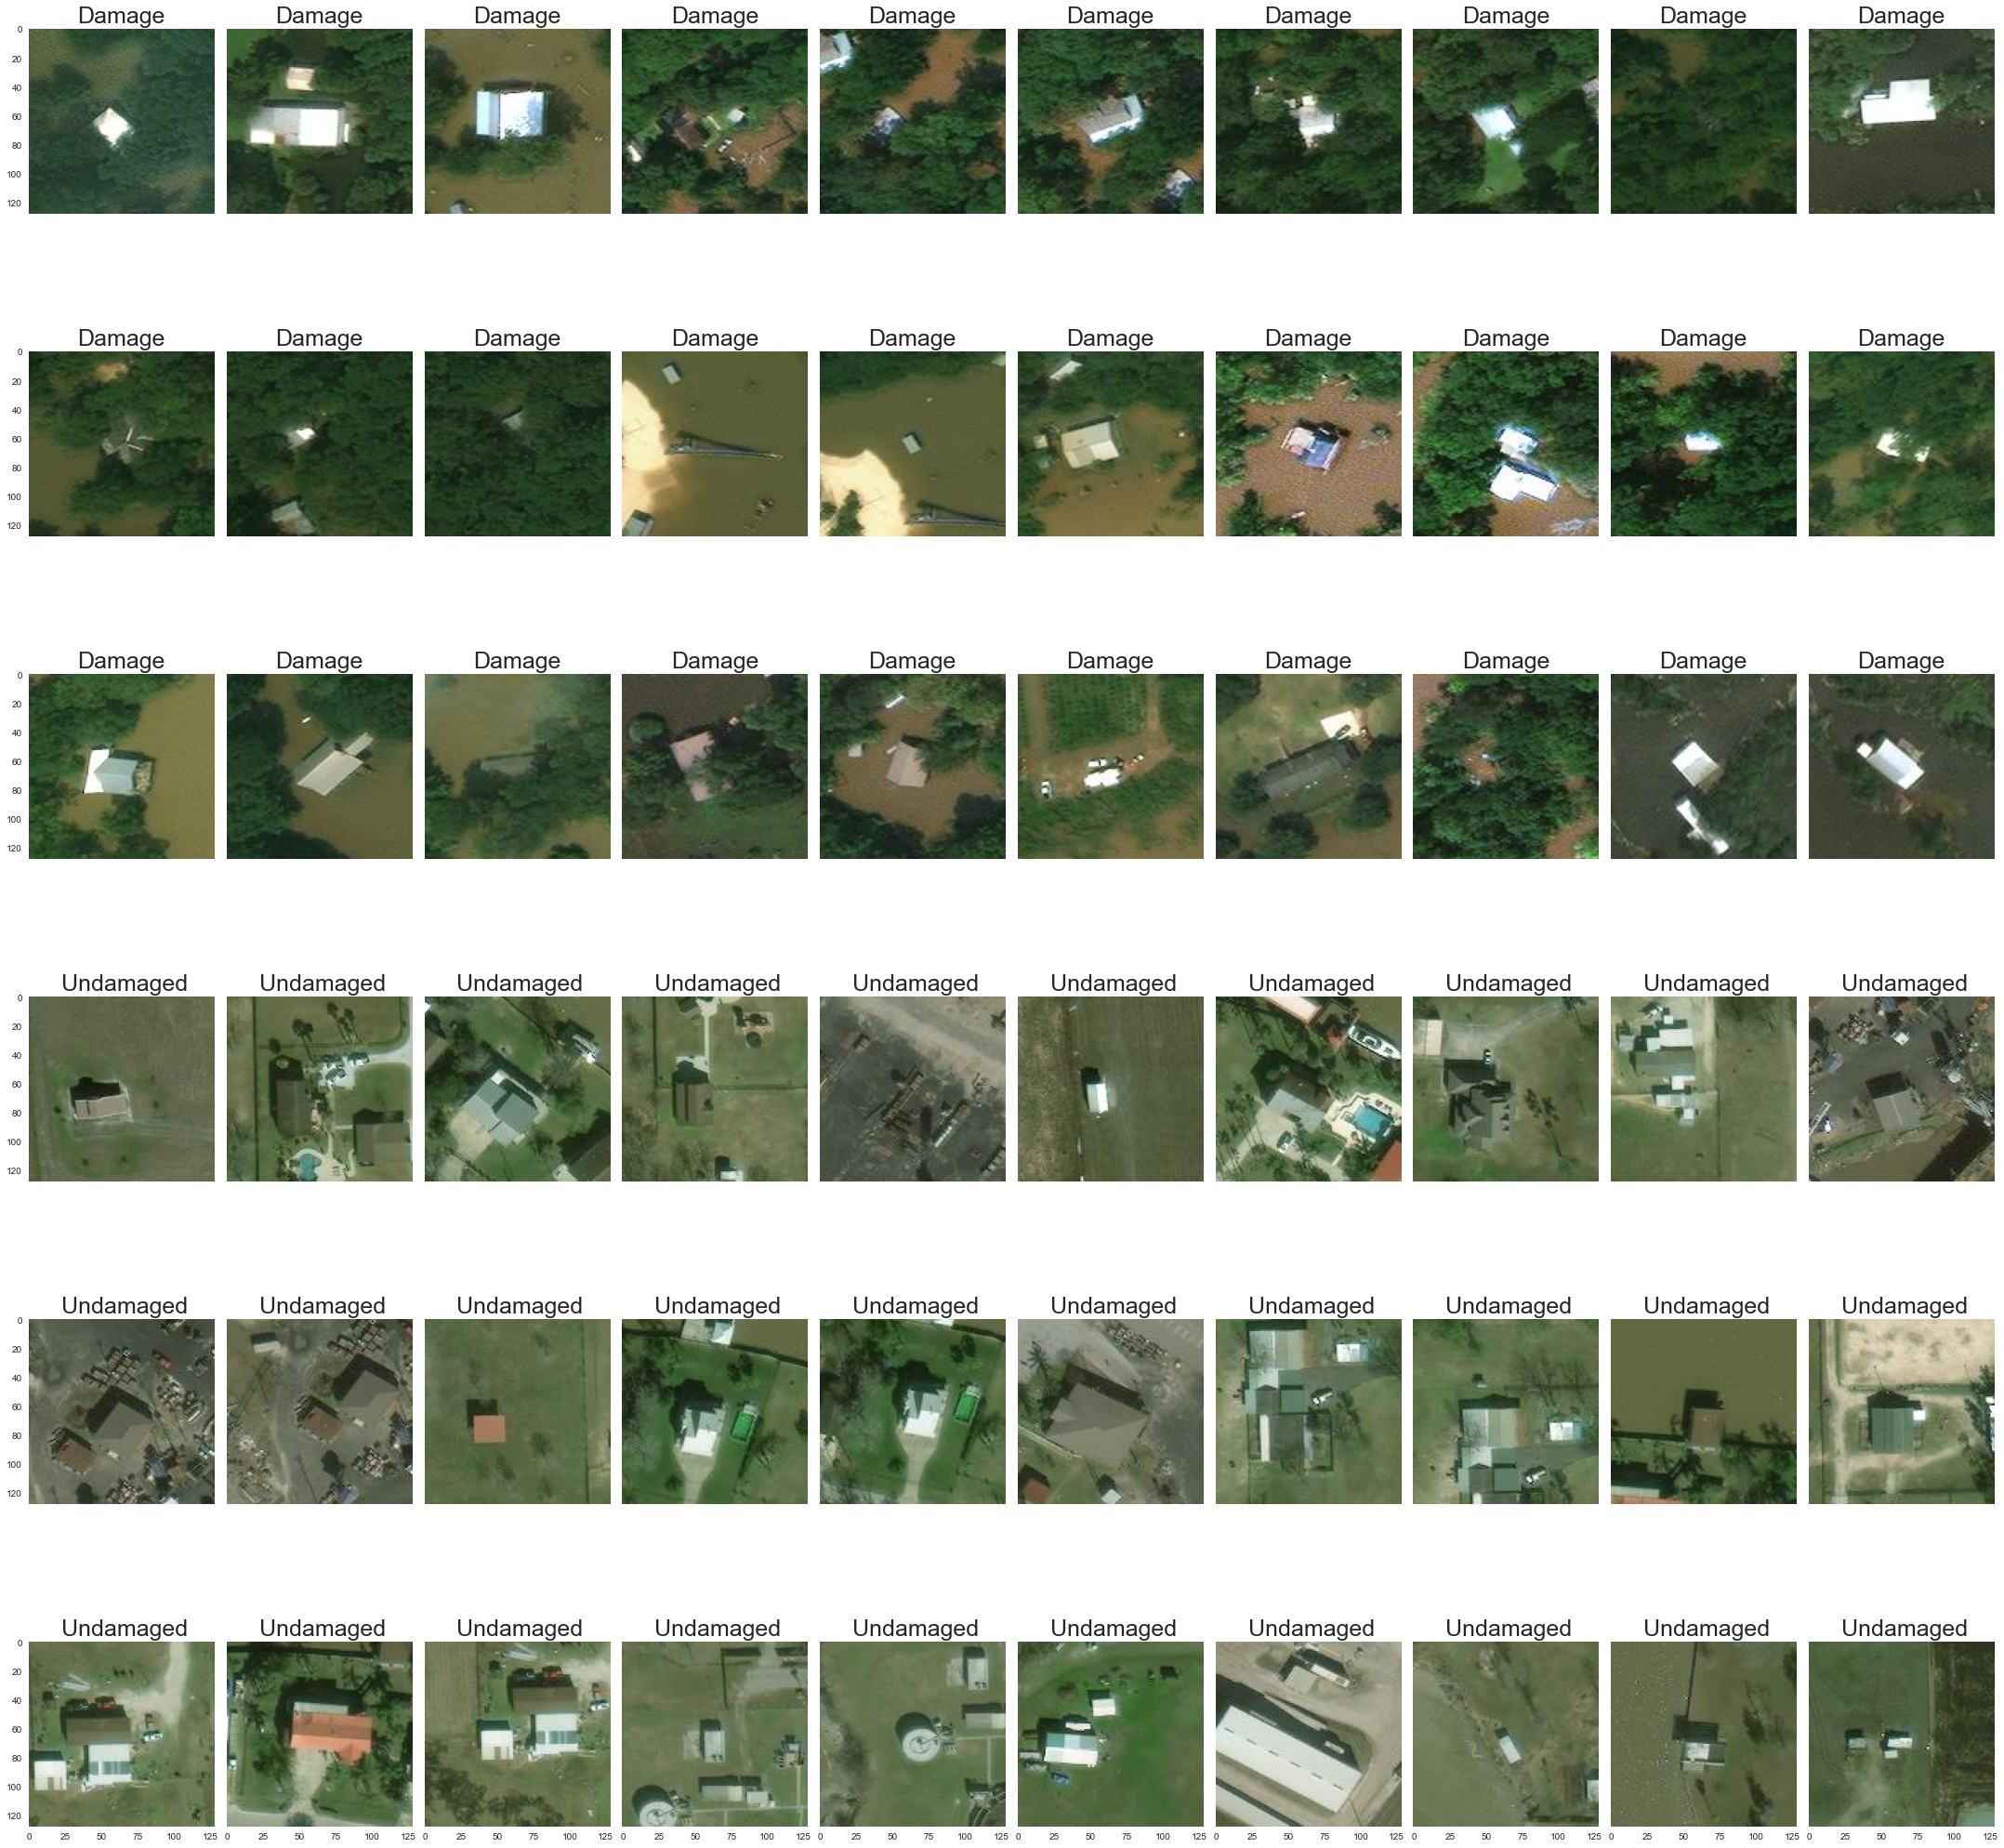

In [271]:
fig, ax = plt.subplots(nrows=6, ncols=10, sharex=True, sharey=True, figsize=(30,30))

ax = ax.flatten()
for i in range(30):
    ax[i].imshow(damaged_df['image'][i])
    ax[i].set_title('Damage',fontsize=25)
    ax[i].grid(False)
for i in range(30,60):
    ax[i].imshow(no_damage_df['image'][i])
    ax[i].set_title(' Undamaged',fontsize=25)
    ax[i].grid(False)
fig.tight_layout()
plt.show()


It's clear there's a lot of flood damage in the above images. It's possible the damaged images have more of a green tint to them because flooding more consistently occurs near rivers, where the edges are usually covered in green foliage. The prevalence of grayish-brown in the non-damaged images could be due to the  gray color of the pavement. When flooding occurs the pavement is most likely going to be covered by brownish water.   


#### Compare mean images

Now that we have a good idea of what the images look like, let's plot the mean image for each class and see how similar they are using the structural similarity index measure (SSIM). The SSIM  is used for measuring the similarity between two images.  SSIM is often compared to other metrics, including more simple metrics such as mean squared error and normalized root mean squared error. SSIM has been repeatedly shown to significantly outperform MSE in accuracy. The SSIM returns a value between -1 and 1: 1 where the two images are identical and 0 if the images have no structural similarity.  

In [436]:
# define a function to calculate the mean image
def average_img(imlist):
    """Calculates mean image from list of images"""
    images = np.array([np.array(plt.imread(fname)) for fname in imlist])
    arr = np.array(np.mean(images, axis=(0)), dtype=np.uint8)
    return arr

# Create list of damaged and undamged images
damaged_list = list(damaged_df.path)
undamaged_list = list(no_damage_df.path)

#Plot
arr_damaged = average_img(damaged_list)
arr_undamaged = average_img(undamaged_list)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(arr_damaged)
plt.grid(False)
plt.title('Damaged')
plt.subplot(1,2,2)
plt.imshow(arr_undamaged)
plt.grid(False)
plt.title('Undamaged')
plt.show()
# Compare images
from skimage.metrics import structural_similarity
print(f"Structural Similarity Index: {structural_similarity(arr_damaged,arr_undamaged,multichannel=True,)}")

Structural Similarity Index: 0.9858922427543618


Wow! The mean image for both classes are very similar. How could a model possibly predict the difference between the two classes? One possible solution would be identifying different objects in each class and comparing them. Let's take a look at some object detection techniques. 

### Image Thresholding



Thresholding lets us isolate elements and is used in object detection. Let's see if we can segment images using thresholding. 

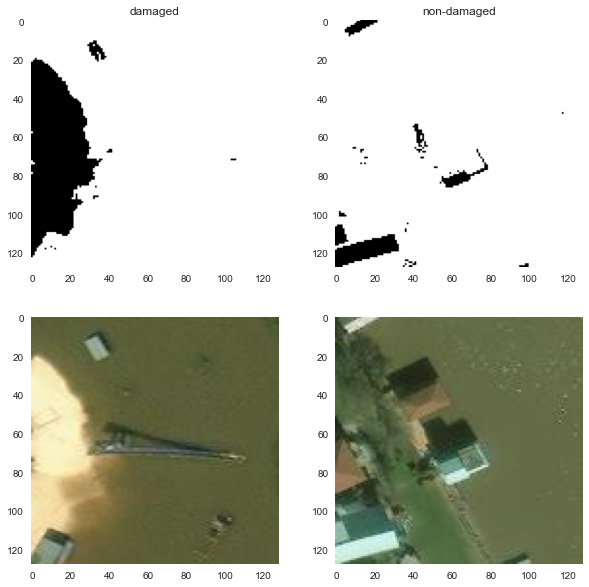

In [88]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray 

damaged_img = plt.imread(damaged_df['path'][13]) # read in damaged image
non_damaged_img = plt.imread(no_damage_df['path'][12]) # read in non-damaged image

# Convert to grayscale
damaged_img_g = rgb2gray(damaged_img)
non_damaged_img_g = rgb2gray(non_damaged_img)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(damaged_img_g)
thresh2 = threshold_otsu(non_damaged_img_g)

# Apply thresholding to the image
binary = damaged_img_g > thresh
binary2 = non_damaged_img_g > thresh

# Plot threshold image compared to original
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(binary)
plt.title('Damaged')
plt.grid(False)
plt.subplot(2,2,2)
plt.imshow(binary2)
plt.title('Undamaged')
plt.grid(False)
plt.subplot(2,2,3)
plt.imshow(damaged_img)
plt.grid(False)
plt.subplot(2,2,4)
plt.imshow(non_damaged_img)
plt.grid(False)
plt.show()



We can see both of these images are on the shore of a body of water. The damaged image has debris scattered across the water. The threshold filter does a good job of separating the water and buildings in the images for the most part. It has a hard time separating water from grass as you can see in the non-damaged image. It also completely misses the large debris in the middle of the damaged image. Let's try to better segment these images using edge detection.

### Edge Detection

Edge detection is used when we want to divide the image into areas corresponding to different objects. The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. Let's see if we can find anything interesting using this algorithm.

In [61]:
from skimage.feature import canny # Import Canny filter from scikit-image

# apply canny edge detector
canny_damage = canny(damaged_img_g) 
canny_no_damage = canny(non_damaged_img_g)

# Plot canny images and orginals
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(canny_damage)
plt.title('Damaged')
plt.grid(False)
plt.subplot(2,2,2)
plt.imshow(canny_no_damage)
plt.title('Undamaged')
plt.grid(False)
plt.subplot(2,2,3)
plt.imshow(damaged_img)
plt.grid(False)
plt.subplot(2,2,4)
plt.imshow(non_damaged_img)
plt.grid(False)
plt.show()



The canny edge detector does a better job of detecting buildings and debris from the images.This time, the large object in the middle of the damaged image was picked up. The canny images leave whitespace for water which could be useful later on during modeling. It's possible a neural network could use these features to differentiate between the two classes. 

### Histogram of Oriented Gradients (HOG)

The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image.

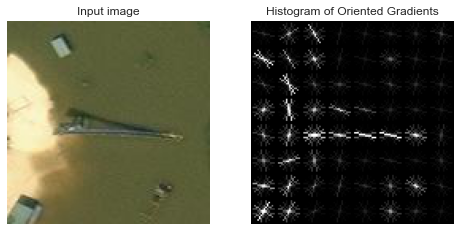

In [99]:
from skimage import feature
from skimage import exposure
fd,fast_damage = feature.hog(damaged_img,orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(damaged_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(fast_damage, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

It looks like the HOG is good at detectig objects as well. It even captures small objects like the small tree in the middle of the water.

# Conclusions & Next Steps

We've learned that the two classes of images are in general very similar structurally and color-wise. The undamaged images have slightly more intensity in all three channels which leads to the damaged images having more of a green tint. The damaged images have more variance in the distribution of means for all three rgb channels. Lastly, the two classes appear to be differentiated by object detection, specifically detecting debris in the damaged class. 

Next, we'll build our own CNN and compare it to a pre-built CNN using transfer learning in hopes of predicting these two classes accurately.
